In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
rui = yf.download('^RUI', start='2017-01-01', end='2023-01-01')
snp = yf.download('^GSPC', start='2017-01-01', end='2023-01-01')
rui.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,1241.959961,1255.449951,1241.959961,1252.109985,1252.109985,0
2017-01-04,1252.430054,1261.829956,1252.430054,1260.750000,1260.750000,0
2017-01-05,1260.719971,1261.119995,1254.540039,1259.319946,1259.319946,0
2017-01-06,1259.500000,1266.359985,1256.819946,1263.479980,1263.479980,0
2017-01-09,1263.400024,1263.400024,1258.880005,1258.880005,1258.880005,0


Text(0, 0.5, 'Index Value')

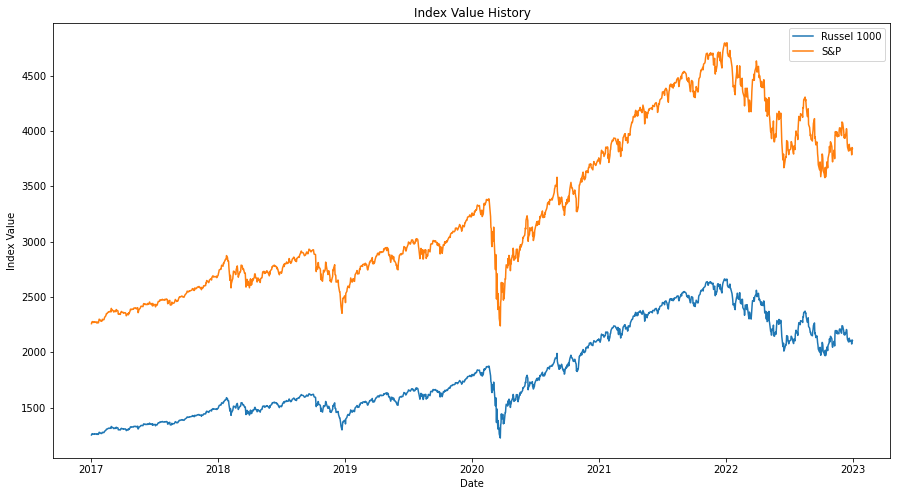

In [4]:
plt.figure(figsize=(15, 8))
plt.title('Index Value History')
plt.plot(rui['Close'])
plt.plot(snp['Close'])
plt.legend(['Russel 1000', 'S&P'])
plt.xlabel('Date')
plt.ylabel('Index Value')

In [158]:

close_prices = rui['Close']
values = close_prices.values
training_data_len = math.ceil(len(values) * 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(90, len(train_data)):
    x_train.append(train_data[i - 90:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

test_data = scaled_data[training_data_len-90: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(90, len(test_data)):
  x_test.append(test_data[i - 90:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [159]:

model = keras.Sequential()
# model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False, input_shape=(x_train.shape[1], 1)))
model.add(layers.Dropout(.2))
model.add(layers.Dense(25))
# model.add(layers.Dropout(.1))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_59 (LSTM)              (None, 90, 100)           40800     
                                                                 
 lstm_60 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_28 (Dropout)        (None, 100)               0         
                                                                 
 dense_63 (Dense)            (None, 25)                2525      
                                                                 
 dense_64 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [160]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
1118/1118 [==============================] - 48s 40ms/step - loss: 0.0037
Epoch 2/3
1118/1118 [==============================] - 46s 41ms/step - loss: 0.0017
Epoch 3/3
1118/1118 [==============================] - 45s 40ms/step - loss: 0.0013


In [161]:
preds = model.predict(x_test)
preds = scaler.inverse_transform(preds)

<ipython-input-162-9583ab30f59b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = preds


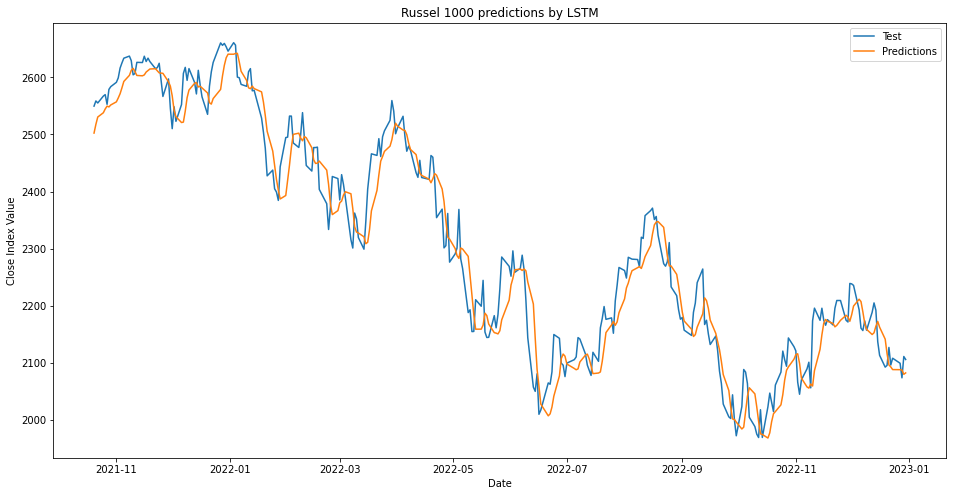

In [162]:

data = rui.filter(['Close'])
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = preds
plt.figure(figsize=(16,8))
plt.title('Russel 1000 predictions by LSTM')
plt.xlabel('Date')
plt.ylabel('Close Index Value')
# plt.plot(train)
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Test', 'Predictions'], loc='upper right')
plt.show()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_63 (LSTM)              (None, 90, 100)           40800     
                                                                 
 lstm_64 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_30 (Dropout)        (None, 100)               0         
                                                                 
 dense_67 (Dense)            (None, 25)                2525      
                                                                 
 dense_68 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
1118/1118 [==========================

<ipython-input-165-605877c20ec0>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2['Predictions'] = preds


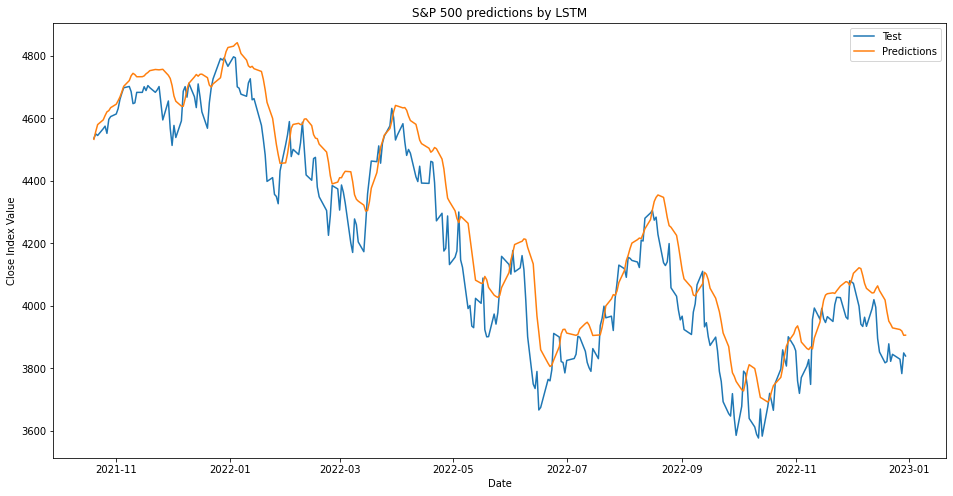

In [165]:

close_prices = snp['Close']
values = close_prices.values
training_data_len = math.ceil(len(values) * 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(90, len(train_data)):
    x_train.append(train_data[i - 90:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

test_data = scaled_data[training_data_len-90: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(90, len(test_data)):
  x_test.append(test_data[i - 90:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model = keras.Sequential()
# model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False, input_shape=(x_train.shape[1], 1)))
model.add(layers.Dropout(.2))
model.add(layers.Dense(25))
# model.add(layers.Dropout(.1))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

preds = model.predict(x_test)
preds = scaler.inverse_transform(preds)

data = snp.filter(['Close'])
train = data[:training_data_len]
test_2 = data[training_data_len:]
test_2['Predictions'] = preds
plt.figure(figsize=(16,8))
plt.title('S&P 500 predictions by LSTM')
plt.xlabel('Date')
plt.ylabel('Close Index Value')
# plt.plot(train)
# plt.plot(test[['Close', 'Predictions']])
plt.plot(test_2[['Close', 'Predictions']])
plt.legend(['Test', 'Predictions'], loc='upper right')
plt.show()

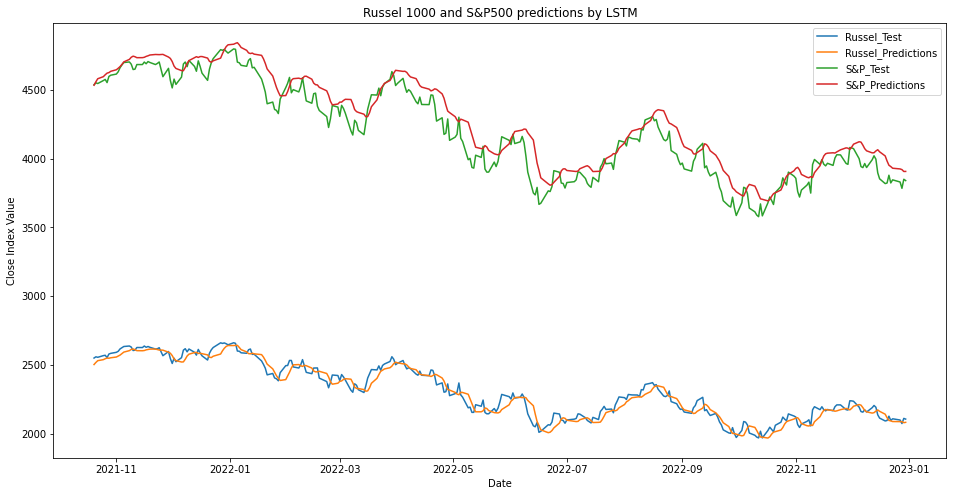

In [166]:
plt.figure(figsize=(16,8))
plt.title('Russel 1000 and S&P500 predictions by LSTM')
plt.xlabel('Date')
plt.ylabel('Close Index Value')
# plt.plot(train)
plt.plot(test[['Close', 'Predictions']])
plt.plot(test_2[['Close', 'Predictions']])
plt.legend(['Russel_Test', 'Russel_Predictions', 'S&P_Test', 'S&P_Predictions'], loc='upper right')
plt.show()